## 07 In-Class Activities : Logistic Regression 2
A bank offer their customers to join a term deposit (ex: deposite for 3 months to get 2% interest rate). The data (bank.csv) is from kaggle. It is already in the datasets folder. Create a logistic model to predict that the customer will join or not.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

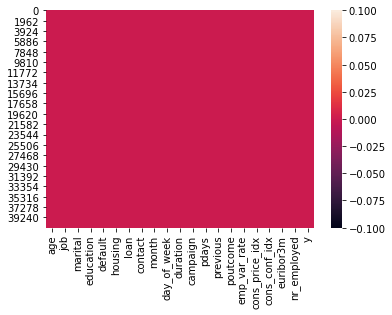

In [44]:
df = pd.read_csv('./datasets/banking.csv')
sns.heatmap(df.isnull())


In [45]:
# df.iloc[:, -1].head(10)

In [46]:
df = df.iloc[ : , 10: ]
df = df.drop('poutcome', axis = 1)
df

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...
41183,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0
41184,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0
41185,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0
41186,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0


In [47]:
X = df.drop(['y'], axis = 1)
y = df.loc[:, 'y']



In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=161)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(28831, 9)
(12357, 9)
(28831,)
(12357,)


In [49]:
from sklearn.linear_model import LogisticRegression
lgm = LogisticRegression()

In [50]:
lgm.fit(X_train,y_train)

C:\Users\NetNapat2543\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
predictions = lgm.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))


[[10709   293]
 [  800   555]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11002
           1       0.65      0.41      0.50      1355

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



C:\Users\NetNapat2543\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

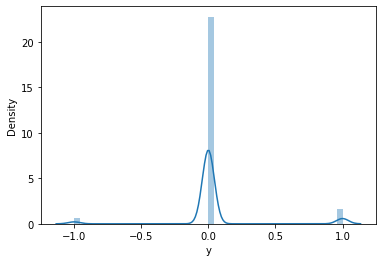

In [56]:
test_df = pd.DataFrame()
test_df["prediction"] = predictions
test_df["actual"] = y_test

# sns.scatterplot(data=test_df,x="actual",y="prediction")
sns.distplot((y_test-predictions))